<a href="https://colab.research.google.com/github/ESBL01/2025_AI/blob/main/CIFAR_100_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)


100%|██████████| 169M/169M [00:01<00:00, 90.0MB/s]


In [6]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),  # 32x16x16
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)  # 64x8x8
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 100)
        )

    def forward(self, x):
        return self.fc(self.conv(x))

def evaluate(model):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for x, y in testloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return 100 * correct / total

model_cnn = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

cnn_acc = []
for epoch in range(20):
    model_cnn.train()
    for x, y in trainloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        loss = criterion(model_cnn(x), y)
        loss.backward()
        optimizer.step()

    acc = evaluate(model_cnn)
    cnn_acc.append(acc)
    print(f"SimpleCNN Epoch {epoch+1}: {acc:.2f}%")

SimpleCNN Epoch 1: 28.67%
SimpleCNN Epoch 2: 35.28%
SimpleCNN Epoch 3: 39.18%
SimpleCNN Epoch 4: 40.47%
SimpleCNN Epoch 5: 41.82%
SimpleCNN Epoch 6: 40.77%
SimpleCNN Epoch 7: 40.88%
SimpleCNN Epoch 8: 40.32%
SimpleCNN Epoch 9: 39.50%
SimpleCNN Epoch 10: 39.31%
SimpleCNN Epoch 11: 38.88%
SimpleCNN Epoch 12: 38.91%
SimpleCNN Epoch 13: 38.37%
SimpleCNN Epoch 14: 38.19%
SimpleCNN Epoch 15: 37.84%
SimpleCNN Epoch 16: 37.17%
SimpleCNN Epoch 17: 37.25%
SimpleCNN Epoch 18: 37.14%
SimpleCNN Epoch 19: 37.14%
SimpleCNN Epoch 20: 36.66%


In [7]:
import torchvision.models as models

resnet18 = models.resnet18(weights=None)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 100)
resnet18 = resnet18.to(device)

optimizer_resnet = optim.Adam(resnet18.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

resnet_acc = []
for epoch in range(20):
    resnet18.train()
    for x, y in trainloader:
        x, y = x.to(device), y.to(device)
        optimizer_resnet.zero_grad()
        loss = criterion(resnet18(x), y)
        loss.backward()
        optimizer_resnet.step()

    acc = evaluate(resnet18)
    resnet_acc.append(acc)
    print(f"ResNet18 Epoch {epoch+1}: {acc:.2f}%")


ResNet18 Epoch 1: 21.61%
ResNet18 Epoch 2: 31.73%
ResNet18 Epoch 3: 36.79%
ResNet18 Epoch 4: 38.41%
ResNet18 Epoch 5: 40.65%
ResNet18 Epoch 6: 43.20%
ResNet18 Epoch 7: 43.04%
ResNet18 Epoch 8: 42.10%
ResNet18 Epoch 9: 41.72%
ResNet18 Epoch 10: 43.39%
ResNet18 Epoch 11: 42.36%
ResNet18 Epoch 12: 42.47%
ResNet18 Epoch 13: 43.77%
ResNet18 Epoch 14: 42.76%
ResNet18 Epoch 15: 43.08%
ResNet18 Epoch 16: 43.22%
ResNet18 Epoch 17: 42.34%
ResNet18 Epoch 18: 43.31%
ResNet18 Epoch 19: 43.82%
ResNet18 Epoch 20: 43.41%


In [8]:
efficientnet = models.efficientnet_b0(weights=None)
efficientnet.classifier[1] = nn.Linear(efficientnet.classifier[1].in_features, 100)
efficientnet = efficientnet.to(device)

optimizer_eff = optim.Adam(efficientnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

eff_acc = []
for epoch in range(20):
    efficientnet.train()
    for x, y in trainloader:
        x, y = x.to(device), y.to(device)
        optimizer_eff.zero_grad()
        loss = criterion(efficientnet(x), y)
        loss.backward()
        optimizer_eff.step()

    acc = evaluate(efficientnet)
    eff_acc.append(acc)
    print(f"EfficientNet_b0 Epoch {epoch+1}: {acc:.2f}%")


EfficientNet_b0 Epoch 1: 9.43%
EfficientNet_b0 Epoch 2: 13.89%
EfficientNet_b0 Epoch 3: 17.97%
EfficientNet_b0 Epoch 4: 20.78%
EfficientNet_b0 Epoch 5: 23.95%
EfficientNet_b0 Epoch 6: 24.82%
EfficientNet_b0 Epoch 7: 27.73%
EfficientNet_b0 Epoch 8: 30.56%
EfficientNet_b0 Epoch 9: 31.64%
EfficientNet_b0 Epoch 10: 33.65%
EfficientNet_b0 Epoch 11: 34.30%
EfficientNet_b0 Epoch 12: 31.48%
EfficientNet_b0 Epoch 13: 36.07%
EfficientNet_b0 Epoch 14: 38.44%
EfficientNet_b0 Epoch 15: 38.93%
EfficientNet_b0 Epoch 16: 37.96%
EfficientNet_b0 Epoch 17: 38.77%
EfficientNet_b0 Epoch 18: 39.29%
EfficientNet_b0 Epoch 19: 37.79%
EfficientNet_b0 Epoch 20: 39.44%


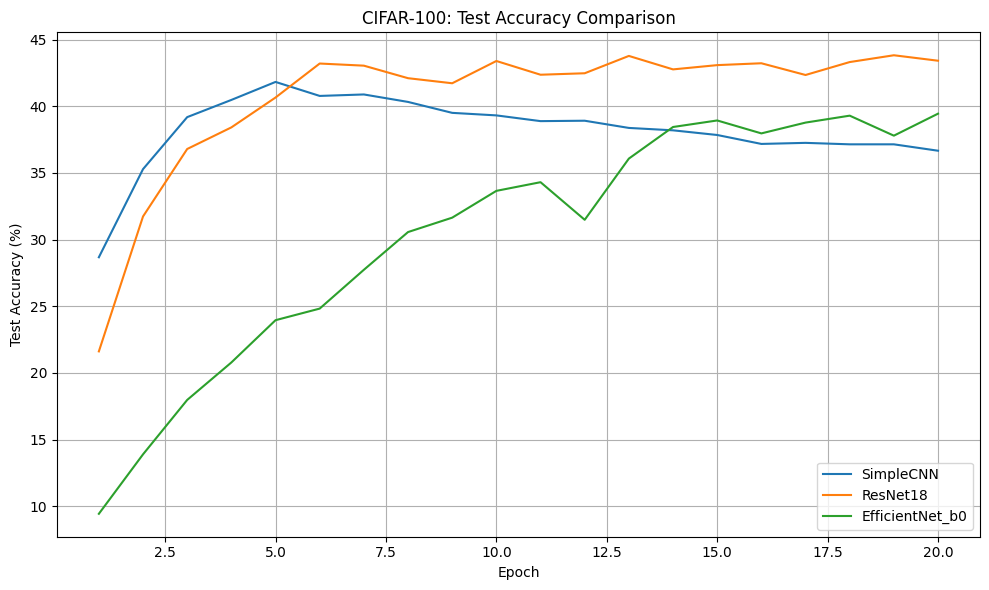

In [9]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.figure(figsize=(10,6))
plt.plot(epochs, cnn_acc, label='SimpleCNN')
plt.plot(epochs, resnet_acc, label='ResNet18')
plt.plot(epochs, eff_acc, label='EfficientNet_b0')

plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("CIFAR-100: Test Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cifar100_model_comparison.png")
plt.show()
